## Exploring Employment Trends in the Midwest: A Comparative Analysis Across States.

----------------------
 ### **Introduction**
 ----------------------
Employment trends offer insights into the economic health of the Midwest. Analyzing state-level employment metrics can reveal growth, stagnation, or decline patterns, which are important for policymakers and businesses. This study examines Midwest employment data to highlight high and low-performing states, identify long-term patterns, and visualize trends using heatmaps and rolling averages to understand the region’s employment dynamics comprehensively.

----------------------
### **Objective**
----------------------
The main objectives of the project are:

•	Visualize employment trends over time for each state in the Midwest, identifying key patterns and shifts.

•	Perform correlation analysis to explore relationships between employment metrics across states.

•	Provide actionable insights through heatmaps, line plots, and comparative analysis to inform economic strategies and interventions.

•	Identify high and low-performing states based on employment statistics and trends.



----------------------
#### **Key Research question**
----------------------
•	How do employment trends and metrics vary across Midwest states, and what patterns can be identified to highlight high and low-performing states over time?

### Importing libraries and loading datasets

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

# Helps on better visalization of graphs
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [84]:
# Load datasets

midwest_emp = pd.read_csv('Midwest_Employment.csv')

In [85]:
midwest_emp.head()

,State,Year,Period,Date,Value
0,Illinois,2019,M01,2019 Jan,3.8
1,Illinois,2019,M02,2019 Feb,3.7
2,Illinois,2019,M03,2019 Mar,3.7
3,Illinois,2019,M04,2019 Apr,3.6
4,Illinois,2019,M05,2019 May,3.6


In [86]:
midwest_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   528 non-null    object 
 1   Year    528 non-null    int64  
 2   Period  528 non-null    object 
 3   Date    528 non-null    object 
 4   Value   528 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 20.8+ KB


In [87]:
# checking shape of the data

print("There are", midwest_emp.shape[0], 'rows and', midwest_emp.shape[1], "columns.")

There are 528 rows and 5 columns.


In [88]:
# Descriptive statistics of the dataset
desc_stats = midwest_emp.describe()

In [89]:
# checking for missing values
missing_values = midwest_emp.isnull().sum()

In [90]:
# Correlation matris focusing on Value
correlation_matrix = midwest_emp.corr(numeric_only=True)['Value'].sort_values(ascending=False)

#### Show employment trends over time for each state.

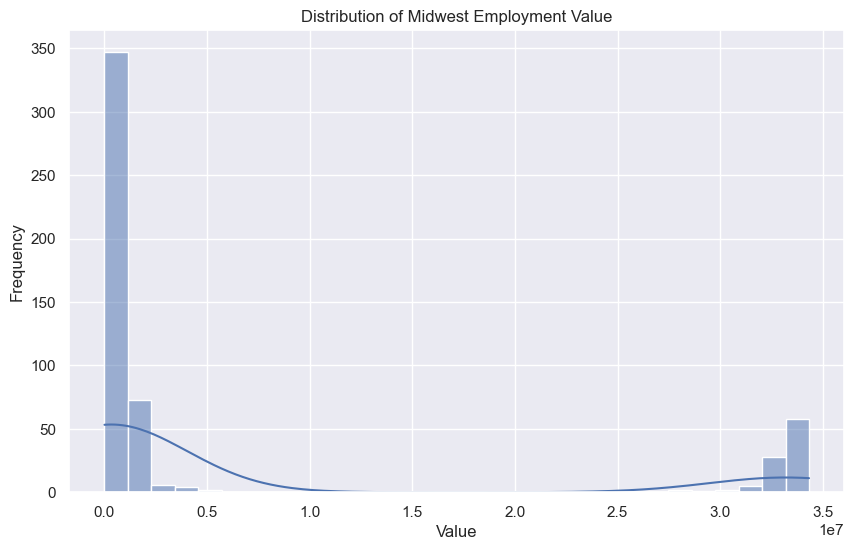

In [91]:
# Visualization: Distribution of Value
plt.figure(figsize=(10, 6))
sns.histplot(midwest_emp['Value'], kde=True, bins=30)
plt.title('Distribution of Midwest Employment Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

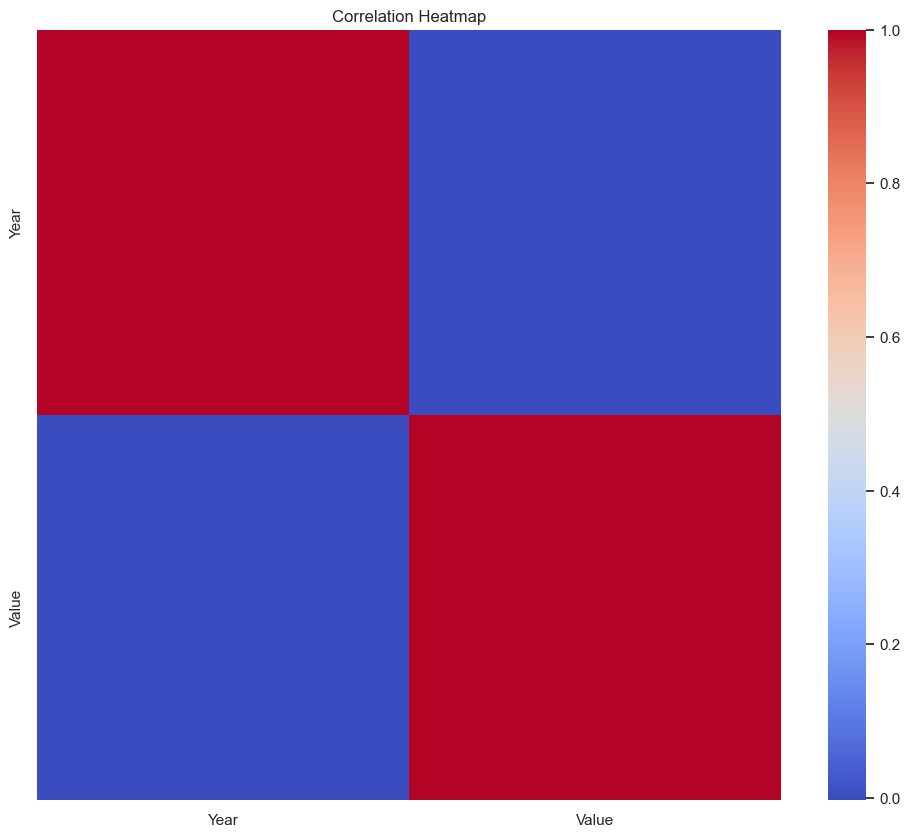

(              Year         Value
 count   528.000000  5.280000e+02
 mean   2020.500000  6.322239e+06
 std       1.119094  1.265672e+07
 min    2019.000000  2.800000e+00
 25%    2019.750000  4.100000e+00
 50%    2020.500000  9.400000e+00
 75%    2021.250000  1.487881e+06
 max    2022.000000  3.432468e+07,
 State     0
 Year      0
 Period    0
 Date      0
 Value     0
 dtype: int64,
 Value    1.000000
 Year    -0.002828
 Name: Value, dtype: float64)

In [92]:
# Visualization:Heatmap correlation
plt.figure(figsize=(12, 10))
sns.heatmap(midwest_emp.corr(numeric_only=True), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

desc_stats, missing_values, correlation_matrix

In [93]:
# Employment-related statistics
employment_columns = ['Value']

for col in employment_columns:
    print(f"\nStatistics for {col}:")
    print(midwest_emp[col].describe())

# Summing up total employment categories
total_employment = midwest_emp[employment_columns].sum()
print("\nTotal Employment Data in the Midwest:")
print(total_employment)


Statistics for Value:
count    5.280000e+02
mean     6.322239e+06
std      1.265672e+07
min      2.800000e+00
25%      4.100000e+00
50%      9.400000e+00
75%      1.487881e+06
max      3.432468e+07
Name: Value, dtype: float64

Total Employment Data in the Midwest:
Value    3.338142e+09
dtype: float64


### Trend Analysis
#### Showing employment trends over time for each state.

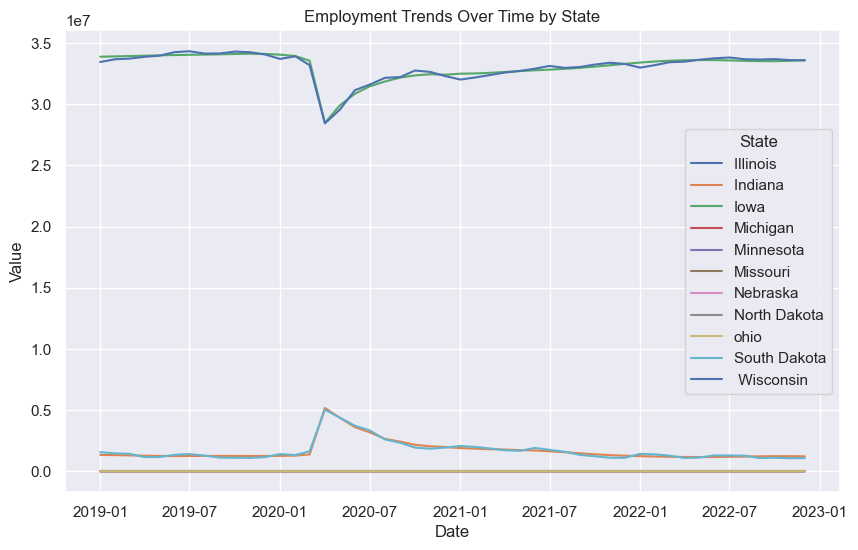

In [94]:

# Convert `Date` to datetime for accurate plotting
midwest_emp['Date'] = pd.to_datetime(midwest_emp['Date'], format='%Y %b')

# Plot trends for each state
plt.figure(figsize=(10, 6))
for state in midwest_emp['State'].unique():
    state_midwest_emp = midwest_emp[midwest_emp['State'] == state]
    plt.plot(state_midwest_emp['Date'], state_midwest_emp['Value'], label=state)

plt.title('Employment Trends Over Time by State')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='State')
plt.grid(True)
plt.show()

### Employment Metrics between States
#### Compare average employment Value between states over the year.

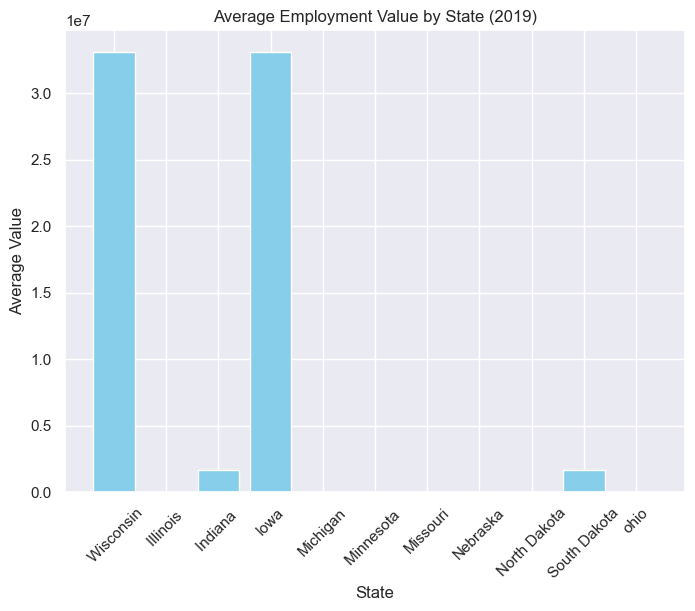

In [95]:
# Compute average employment value by state
state_avg = midwest_emp.groupby('State')['Value'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(state_avg['State'], state_avg['Value'], color='skyblue')
plt.title('Average Employment Value by State (2019)')
plt.xlabel('State')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

### Identifying High and Low Performing States
#### Highlighting the distribution of employment Value for each state.

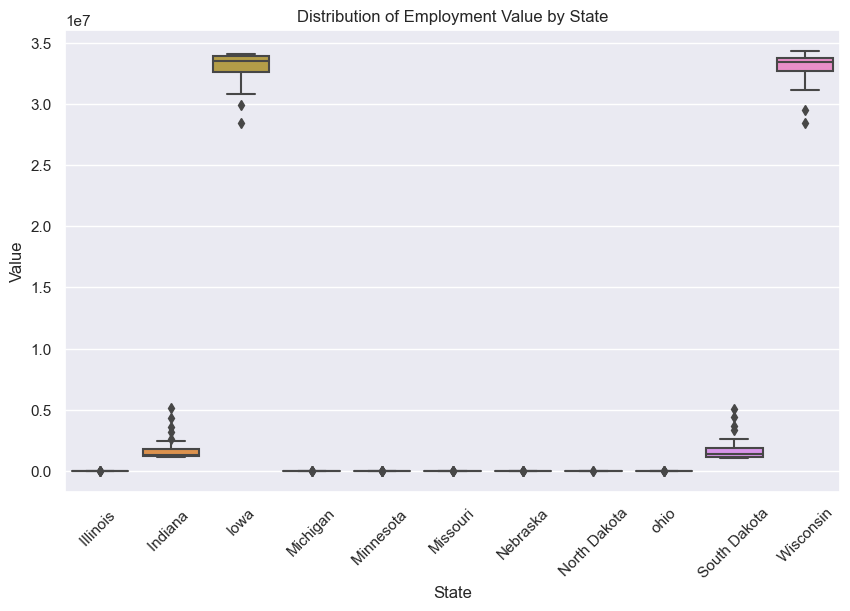

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Value', data=midwest_emp)
plt.title('Distribution of Employment Value by State')
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

### Time-Series Analysis
#### Smooth the trends using a rolling average to analyze long-term patterns.

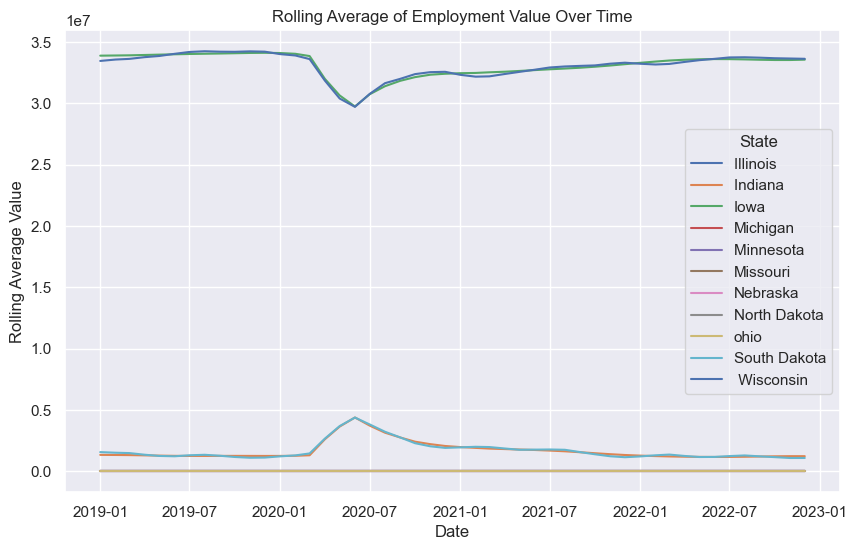

In [97]:
# Add rolling average for each state
midwest_emp['RollingAvg'] = midwest_emp.groupby('State')['Value'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Plot
plt.figure(figsize=(10, 6))
for state in midwest_emp['State'].unique():
    state_midwest_emp = midwest_emp[midwest_emp['State'] == state]
    plt.plot(state_midwest_emp['Date'], state_midwest_emp['RollingAvg'], label=state)

plt.title('Rolling Average of Employment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Average Value')
plt.legend(title='State')
plt.grid(True)
plt.show()

In [98]:
# Assuming 'State' column exists and Rural states are predefined
rural_states = ['Illinois', 'Wisconson', 'North Dakota', 'South Dakota', 'Indiana', 'Ohio', 'Missouri', 'Michigan', 'Nebraska', 'Iowa', 'Kansas', 'Minnesota']  # Example states
midwest_emp['Region_Type'] = midwest_emp['State'].apply(lambda x: 'Rural' if x in rural_states else 'Urban')

# Now you can split the data
rural_data = midwest_emp[midwest_emp['Region_Type'] == 'Rural']
urban_data = midwest_emp[midwest_emp['Region_Type'] == 'Urban']

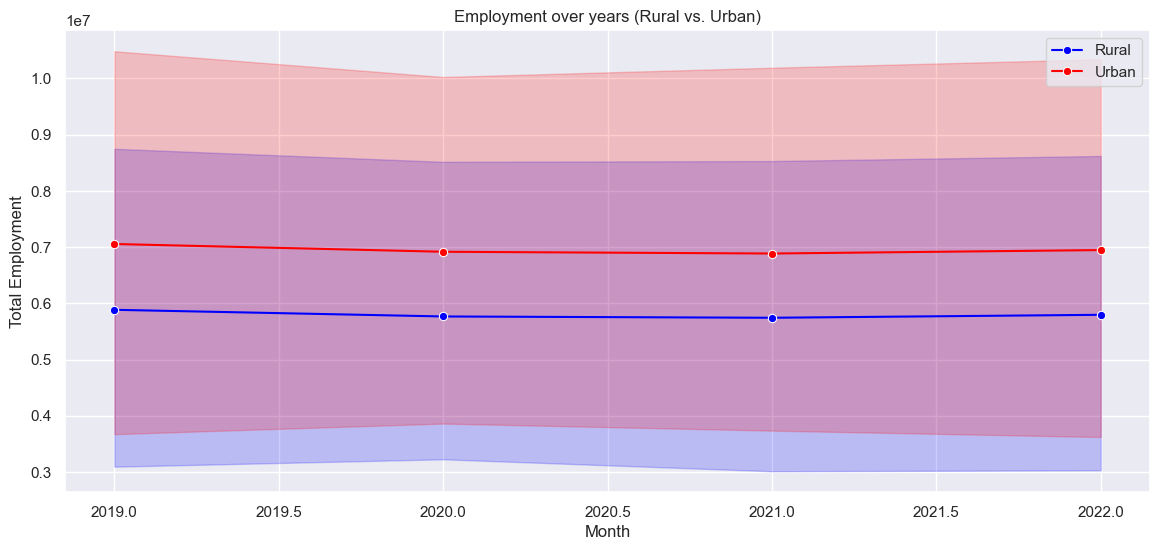

In [99]:
# Plotting trends in rural vs. urban areas

plt.figure(figsize=(14, 6))
sns.lineplot(data=rural_data, x='Year', y='Value', marker='o', label='Rural', color='blue')
sns.lineplot(data=urban_data, x='Year', y='Value', marker='o', label='Urban', color='red')
plt.title('Employment over years (Rural vs. Urban)')
plt.xlabel('Month')
plt.ylabel('Total Employment')
plt.legend()
plt.show()

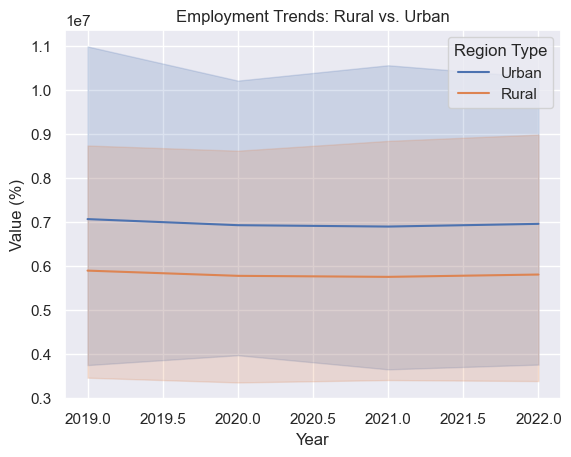

In [100]:
# Employment Trends (Line Plot)
sns.lineplot(data=midwest_emp, x='Year', y='Value', hue='Region_Type')
plt.title('Employment Trends: Rural vs. Urban')
plt.xlabel('Year')
plt.ylabel('Value (%)')
plt.legend(title='Region Type')
plt.show()